# Метрики качества классификации

In [1]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации
from sklearn.datasets import load_breast_cancer # подгружаем датасет

In [2]:
breast_cancer = load_breast_cancer()

In [3]:
# Теперь зададим зависимую и независимые переменные:
Y = breast_cancer.target ## Наша целевая переменная, 0 — если рака нет, 1 — если есть 
X = breast_cancer.data # X - признаки, по которым мы будем предсказывать рак 

In [4]:
# Разбиваем выборку на обучающую и тестовую и обучаем нашу модель:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_train, Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Готово! Теперь осталось только вычислить необходимые метрики:

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))
print(precision_score(Y_val,Y_predicted))
print(recall_score(Y_val,Y_predicted))
print(f1_score(Y_val,Y_predicted))

0.9590643274853801
0.9333333333333333
1.0
0.9655172413793104


## Задание 3B.2.1
Вы создали классификатор, который разделяет экономические и политические новости на два разных Telegram-канала, и хотите проверить его качество. За день вышло 15 политических новостей и 20 экономических.
Ваш алгоритм из 15 политических новостей отметил 9 как экономические, а из 20 экономических — 6 как политические.
Найдите метрику Accuracy.

In [6]:
Accuracy = ((15 - 9) + (20 - 6)) / (15 + 20)
round(Accuracy, 2)

0.57

## Задание 3B2.2

Загрузите встроенный в библиотеку sklearn датасет про ирисы с помощью функции load_iris. Обучите модель логистической регрессии (random_state=50, размер тестовой выборки 0.3) и укажите полученное значение метрики Accuracy.

In [16]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации
from sklearn.datasets import load_breast_cancer # подгружаем датасет

In [17]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [33]:
# Получаем данные
iris = load_iris()

# Теперь зададим зависимую и независимые переменные:
Y = iris['target'] ## Наша целевая переменная, 0 — не ирис, 1 — если ирис 
X = iris['data'] # X - признаки, по которым мы будем предсказывать ирис 

Y = iris.target ## Наша целевая переменная, 0 — не ирис, 1 — если ирис 
X = iris.data # X - признаки, по которым мы будем предсказывать ирис 

# Разбиваем выборку на обучающую и тестовую и обучаем нашу модель:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state=50)
model = LogisticRegression(random_state=50)
model.fit(X_train, Y_train)

# Делаем предсказание
Y_predicted = model.predict(X_val)

# Рассчитываем метрику
round(accuracy_score(Y_val,Y_predicted), 2)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.91

In [25]:
from sklearn.datasets import load_iris # подгружаем датасет
iris = load_iris()
Y = iris.target ## Наша целевая переменная, 0 — не ирис, 1 — если ирис 
X = iris.data # X - признаки, по которым мы будем предсказывать ирис 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state=50)
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, Y_train)
Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))

0.9333333333333333


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [46]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

# Классификация. Практика

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
data = pd.read_csv('../data/train_mobile.csv', sep=';')

### Шаг 1

Для начала нам надо отобрать признаки, с помощью которых мы будем предсказывать категорию телефона.

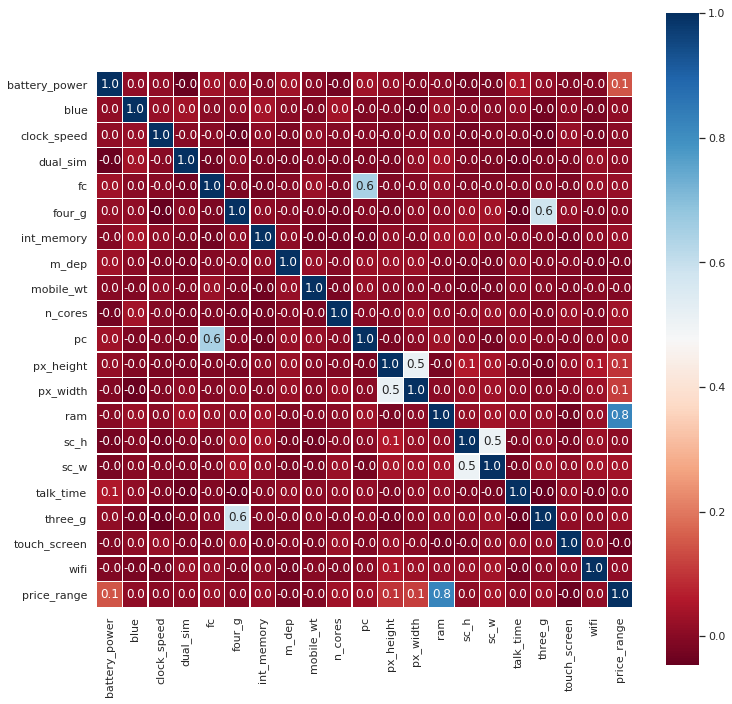

In [44]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [45]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.149402
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.014001
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,0.003494
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.009002
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.022464
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.001001
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.022132
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,-0.018554
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.007968
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.031260


In [47]:
feature_columns = ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']

### ШАГ 2

Теперь необходимо обучить алгоритм.  Для начала разбейте выборку на тестовую и обучающую, размер тестовой задайте 0.2. Параметр random_state=31. В качестве модели возьмите логистическую регрессию. В качестве предикторов возьмите пять ранее отобранных признаков.

Рассчитайте метрику, которая покажет, какая доля телефонов, обозначенных классификатором как дорогие, действительно относится к этой категории. 

In [53]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации
from sklearn.metrics import 

In [54]:
X = data[feature_columns].values
y = data['price_range'].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=31)

In [62]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

round(precision_score(y_test, y_pred), 4)

0.9859

## Логистическая регрессия. Часть 2

#### Задание 3B.5.3

Посчитайте logloss для данных в таблице (без нормализации). Укажите число с точностью до сотых:

In [67]:
import numpy as np

In [81]:
y_pred = np.array([0.2, 0.8,  0.6])
y_act = np.array([0, 0,  1])

In [82]:
logloss = y_act * np.log(y_pred) + (1 - y_act) * np.log(1 - y_pred)

In [84]:
round(logloss.sum(), 2)

-2.34

In [96]:
y_pred = np.array([[0.2, 0.8, 1, 0.6],
                   [0.8, 0.2, 0, 0.4]])
y_act = np.array([[0, 0, 1, 1],
                  [1, 1, 0, 0]])

In [97]:
# исходя из формулы, необходимо найти сумму логарифмов от ненулевых значений
y = y_pred * y_act

# просуммируем по столбцам, тем самым уберем нули и перейдем к одномерному массиву
y = y.sum(axis=0)

# возьмем логариф поэлементно и просуммируем
logloss = - np.log(y).sum()

round(logloss, 2)

2.34

#### Задание 3B.5.4

Посчитайте logloss для данных в таблице. Необходимо найти среднюю ошибку. Классификация на три класса:

In [98]:
y_pred = np.array([[0.2, 0, 0.1],
                   [0.3, 0, 0],
                   [0.5, 1, 0.9]])
y_act = np.array([[0, 0, 1],
                  [0, 0, 0],
                  [1, 1, 0]])

In [99]:
# исходя из формулы, необходимо найти сумму логарифмов от ненулевых значений
y = y_pred * y_act

# просуммируем по столбцам, тем самым уберем нули и перейдем к одномерному массиву
y = y.sum(axis=0)

# возьмем логариф поэлементно и просуммируем. Для многомерного случая надо еще делить на количество наблюдений
logloss = -1/3 * np.log(y).sum()

round(logloss, 2)

1.0